In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


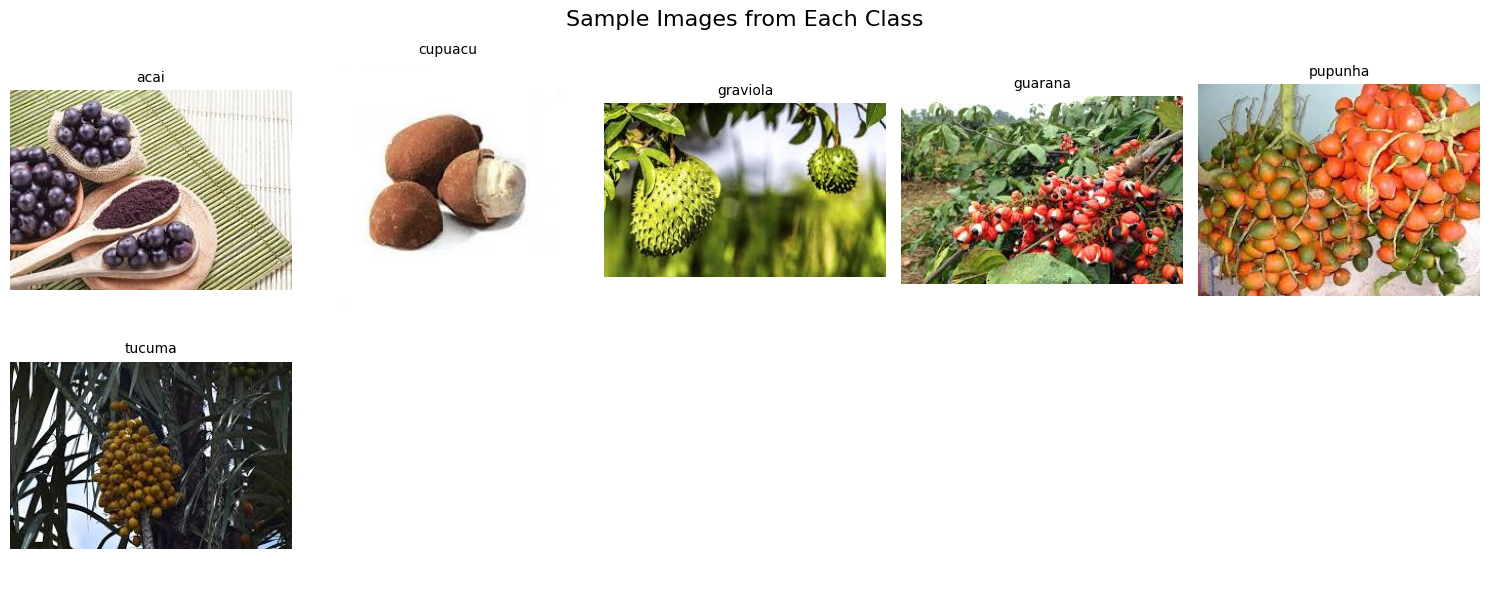

In [57]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [58]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [59]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [63]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Aaryan Tuladhar.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.3038 - loss: 1.6651
Epoch 1: val_loss improved from inf to 1.65605, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.3112 - loss: 1.6625 - val_accuracy: 0.1111 - val_loss: 1.6560
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.5110 - loss: 1.4696
Epoch 2: val_loss did not improve from 1.65605
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 798ms/step - accuracy: 0.5048 - loss: 1.4640 - val_accuracy: 0.0556 - val_loss: 1.7742
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.4282 - loss: 1.3242
Epoch 3: val_loss did not improve from 1.65605
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.4392 - loss: 1.3153 - val_accuracy: 0.1667 - val_loss: 1.7478
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5978 - loss: 1.1316
Epoch 4: val_loss improved from 1.65605 to 0.86496, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step - accuracy: 0.6115 - loss: 1.1175 - val_accuracy: 0.7778 - val_loss: 0.8650
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6667 - loss: 0.9256
Epoch 5: val_loss did not improve from 0.86496
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.6562 - loss: 0.9295 - val_accuracy: 0.4444 - val_loss: 1.4979
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.8594 - loss: 0.7251
Epoch 6: val_loss did not improve from 0.86496
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 527ms/step - accuracy: 0.8633 - loss: 0.7186 - val_accuracy: 0.5556 - val_loss: 0.8767
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6690 - loss: 0.7666
Epoch 7: val_loss improved from 0.86496 to 0.80822, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 495ms/step - accuracy: 0.6753 - loss: 0.7643 - val_accuracy: 0.7222 - val_loss: 0.8082
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9190 - loss: 0.4752
Epoch 8: val_loss improved from 0.80822 to 0.41624, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 0.9253 - loss: 0.4645 - val_accuracy: 0.8889 - val_loss: 0.4162
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.9595 - loss: 0.2439
Epoch 9: val_loss improved from 0.41624 to 0.37857, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 795ms/step - accuracy: 0.9627 - loss: 0.2431 - val_accuracy: 0.8333 - val_loss: 0.3786
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9797 - loss: 0.1754
Epoch 10: val_loss did not improve from 0.37857
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 474ms/step - accuracy: 0.9813 - loss: 0.1732 - val_accuracy: 0.8333 - val_loss: 0.5334
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 1.0000 - loss: 0.1084
Epoch 11: val_loss did not improve from 0.37857
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step - accuracy: 1.0000 - loss: 0.1058 - val_accuracy: 0.8333 - val_loss: 0.3932
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.9902 - loss: 0.0735
Epoch 12: val_loss did not improve from 0.37857
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 0.9891 - loss: 0.0748 - val_accuracy: 0.8333 - val_loss: 0.3797
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 1.0000 - loss: 0.0294
Epoch 13: val_loss did not improve from 0.37857
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.8333 - val_loss: 0.3695
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0072
Epoch 16: val_loss improved from 0.36953 to 0.35765, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.8333 - val_loss: 0.3576
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 17: val_loss improved from 0.35765 to 0.35559, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.8333 - val_loss: 0.3556
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 18: val_loss improved from 0.35559 to 0.34124, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8333 - val_loss: 0.3412
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 19: val_loss improved from 0.34124 to 0.34008, saving model to Aaryan Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8333 - val_loss: 0.3401
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 1.0000 - loss: 0.0022
Epoch 20: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 792ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8333 - val_loss: 0.3530
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 21: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 686ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8333 - val_loss: 0.3573
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 22: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8333 - val_loss: 0.3524
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 23: val_loss did not improve from 0.34008
3/3 

In [64]:
test_dir = '/content/drive/MyDrive/AIandML/FruitinAmazon'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 120 files belonging to 2 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.2056 - loss: 1552.4294
Test Loss: 1617.8021240234375
Test Accuracy: 0.18333333730697632


In [65]:

model.save('aaryan_tuladhar_model.h5')
print("Model saved successfully!")


Model saved successfully!


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.17      0.20        30
           1       0.61      0.19      0.29        90
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.18       120
   macro avg       0.14      0.06      0.08       120
weighted avg       0.51      0.18      0.27       120

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 1: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 802ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8333 - val_loss: 0.3486
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 2: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8333 - val_loss: 0.3660
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 3: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8333 - val_loss: 0.3714
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 4: val_loss did not improve from 0.34008
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8333 - val_loss: 0.3810
Epoch 5/250
3/3 ━━━━━━━━

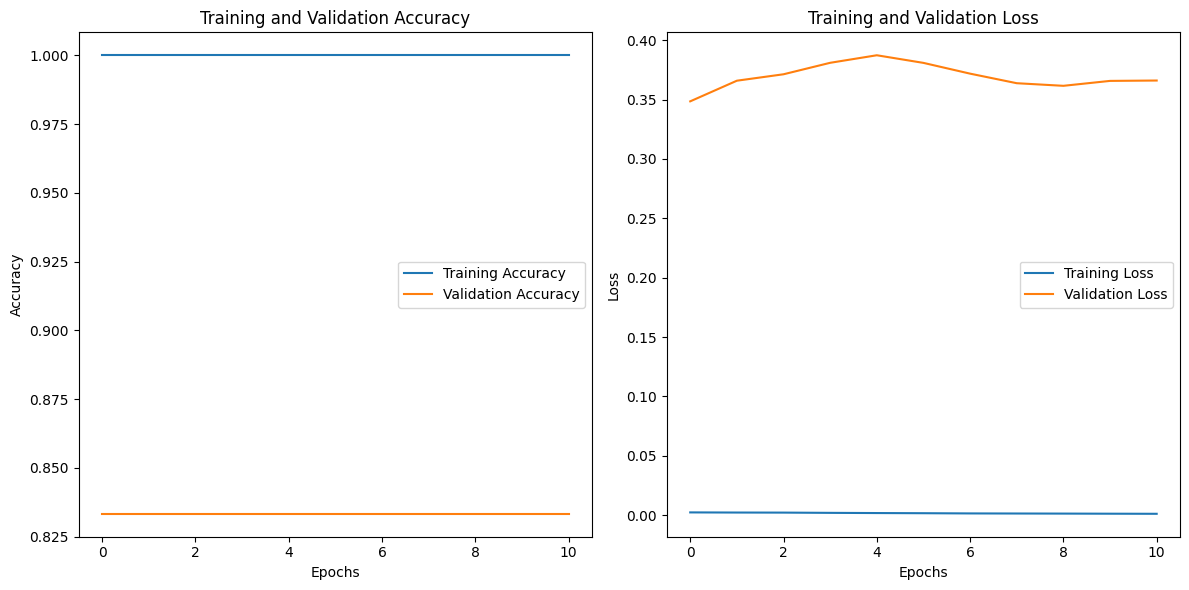

Model saved as 'aaryan_tuladhar_model.h5'


In [66]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('aaryan_tuladhar_model.h5')
print("Model saved as 'aaryan_tuladhar_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [67]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data used for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 989ms/step - accuracy: 0.1244 - loss: 3.0350 - val_accuracy: 0.1667 - val_loss: 2.2926
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 582ms/step - accuracy: 0.4515 - loss: 1.6598 - val_accuracy: 0.1778 - val_loss: 2.0114
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - accuracy: 0.5208 - loss: 1.5216 - val_accuracy: 0.3444 - val_loss: 1.8178
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 0.5366 - loss: 1.2955 - val_accuracy: 0.2444 - val_loss: 1.8188
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5629 - loss: 1.2929 - val_accuracy: 0.2222 - val_loss: 1.8391
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.5387 - loss: 1.2781 - val_accuracy: 0.2556 - val_loss: 1.8825
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - accuracy: 0.5995 - loss: 1.0982 - val_accuracy: 0.2222 - val_loss: 1.9038
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.6325 - loss: 1.1124 - val_accuracy: 0.2222 - val_loss: 1.

## Task 2: Transfer Learning using VGG16

In [70]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 142s 62s/step - accuracy: 0.1973 - loss: 1.8737 - val_accuracy: 0.3222 - val_loss: 1.6110
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 111s 45s/step - accuracy: 0.4909 - loss: 1.5597 - val_accuracy: 0.4889 - val_loss: 1.4315
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 59s/step - accuracy: 0.4694 - loss: 1.5153 - val_accuracy: 0.5556 - val_loss: 1.2883
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 111s 46s/step - accuracy: 0.5475 - loss: 1.3215 - val_accuracy: 0.7444 - val_loss: 1.1219
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 59s/step - accuracy: 0.7163 - loss: 1.1701 - val_accuracy: 0.7000 - val_loss: 1.0237


In [72]:
# Evaluate and Classification Report
import numpy as np
from sklearn.metrics import classification_report

# Predict and report
Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 56s 18s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.29      0.13      0.18        15
     cupuacu       0.21      0.27      0.24        15
    graviola       0.27      0.27      0.27        15
     guarana       0.31      0.67      0.43        15
     pupunha       0.12      0.07      0.09        15
      tucuma       0.33      0.20      0.25        15

    accuracy                           0.27        90
   macro avg       0.26      0.27      0.24        90
weighted avg       0.26      0.27      0.24        90

